# Homework #3:

In [2]:
import pandas as pd
import numpy as np
import pymc as pm
from scipy import stats
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display

In [3]:
# Upload the CSV file using Colab's file upload feature
uploaded = files.upload()

Saving vgchartz_2024.csv to vgchartz_2024 (9).csv


In [4]:
# Check the uploaded file names
file_names = list(uploaded.keys())
print("Uploaded file names:", file_names)

# Read the CSV file into a DataFrame
import io

df = pd.read_csv(io.StringIO(uploaded[file_names[0]].decode('utf-8')))

# Display the DataFrame
df.head()

Uploaded file names: ['vgchartz_2024 (9).csv']


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013/9/17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014/11/18,2018/1/3
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002/10/28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013/9/17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015/11/6,2018/1/14


In [22]:
observed_data = df['critic_score']

with pm.Model() as normal_gamma_model:
    # Prior for the mean and precision (inverse variance)
    mu = pm.Normal('mu', mu=0, sigma=10)
    precision = pm.Gamma('precision', alpha=2, beta=2)

    # Likelihood (Normal distribution)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=precision**-0.5, observed=observed_data)

    # Sampling
    trace_normal_gamma = pm.sample(10, tune=10)

pm.summary(normal_gamma_model).round(2)

/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in likelihood contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not Model

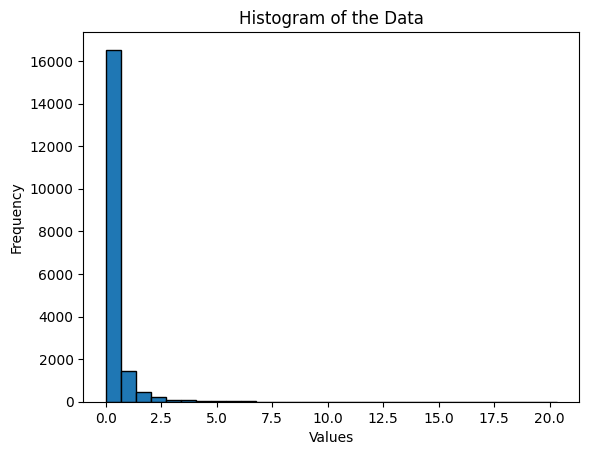

In [12]:
import matplotlib.pyplot as plt

plt.hist(df['total_sales'], bins=30, edgecolor='black')
plt.title('Histogram of the Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [20]:
non_normal_data = df['total_sales']

with pm.Model() as new_model:
    # Prior for the mean and precision (inverse variance)
    mu = pm.Normal('mu', mu=0, sigma=10)
    precision = pm.Gamma('precision', alpha=2, beta=2)
    nu = pm.Exponential('nu', 1/30)  # Degrees of freedom
    new_likelihood = pm.StudentT('new_likelihood', nu=nu, mu=mu, lam=precision**-0.5, observed=non_normal_data)
    # Sampling
    trace_new_model = pm.sample(10, tune=10)

pm.summary(trace_new_model).round(2)

/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in new_likelihood contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [23]:
# Trace plot
pm.traceplot(trace_new_model)

# Posterior plot
pm.plot_posterior(trace_new_model)

# Gelman-Rubin diagnostic
pm.gelman_rubin(trace_new_model)

# Effective sample size
pm.effective_n(trace_new_model)


FutureWarning: The function `traceplot` from PyMC was an alias for `plot_trace` from ArviZ. It was removed in PyMC 4.0. Switch to `pymc.plot_trace` or `arviz.plot_trace`.